In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
# Move model to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("using device  : ", device)

using device  :  cuda


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Datasets')

In [ ]:
!kaggle datasets download -d raddar/chest-xrays-indiana-university

100% 13.1G/13.2G [03:35<00:00, 73.1MB/s]
100% 13.2G/13.2G [03:35<00:00, 65.5MB/s]


In [ ]:
import zipfile
import os

# Path to the zip file and extraction directory
zip_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university.zip'
extract_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university'

# Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

# Path to the extracted dataset folder on your Google Drive
extracted_folder_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university'

# Check if the path exists
if os.path.exists(extracted_folder_path):
    # List the contents of the folder
    extracted_contents = os.listdir(extracted_folder_path)
    print("Contents of the extracted folder:")
    for content in extracted_contents:
        print(content)
else:
    print(f"The specified path does not exist: {extracted_folder_path}")

Contents of the extracted folder:
images
indiana_projections.csv
indiana_reports.csv


In [ ]:
import pandas as pd

# Load and inspect the reports CSV
reports_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/indiana_reports.csv'
reports_df = pd.read_csv(reports_path)
print("Reports DataFrame head:")
reports_df



Reports DataFrame head:


,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...,...
3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3848,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
3849,3998,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.


In [ ]:
# Load and inspect the projections CSV
projections_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/indiana_projections.csv'
projections_df = pd.read_csv(projections_path)
print("\nProjections DataFrame head:")
projections_df



Projections DataFrame head:


,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


In [ ]:
images_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/images/images_normalized'
image_files = os.listdir(images_path)
print("Sample image filenames:")
print(image_files[:10])  # Displaying the first 10 filenames


Sample image filenames:
['1000_IM-0003-1001.dcm.png', '1000_IM-0003-2001.dcm.png', '1000_IM-0003-3001.dcm.png', '1001_IM-0004-1001.dcm.png', '1001_IM-0004-1002.dcm.png', '1002_IM-0004-1001.dcm.png', '1002_IM-0004-2001.dcm.png', '1003_IM-0005-2002.dcm.png', '1004_IM-0005-1001.dcm.png', '1004_IM-0005-2001.dcm.png']


In [ ]:
# Merge reports and projections dataframes
merged_df = pd.merge(reports_df, projections_df, on='uid', how='inner')

# Add a full path to the image filenames
images_path = '/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/images/images_normalized'
merged_df['image_path'] = images_path + '/' + merged_df['filename']

# Display the head of the merged dataframe
print(merged_df.head())

   uid                                               MeSH  \
0    1                                             normal   
1    1                                             normal   
2    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
3    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
4    3                                             normal   

                        Problems                                image  \
0                         normal            Xray Chest PA and Lateral   
1                         normal            Xray Chest PA and Lateral   
2  Cardiomegaly;Pulmonary Artery  Chest, 2 views, frontal and lateral   
3  Cardiomegaly;Pulmonary Artery  Chest, 2 views, frontal and lateral   
4                         normal            Xray Chest PA and Lateral   

                                          indication comparison  \
0                                   Positive TB test      None.   
1                                   Positive TB test      No

In [ ]:
merged_df

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection,image_path
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal,/content/drive/MyDrive/Datasets/chest-xrays-in...
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral,/content/drive/MyDrive/Datasets/chest-xrays-in...
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal,/content/drive/MyDrive/Datasets/chest-xrays-in...
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral,/content/drive/MyDrive/Datasets/chest-xrays-in...
4,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p...",3_IM-1384-1001.dcm.png,Frontal,/content/drive/MyDrive/Datasets/chest-xrays-in...
...,...,...,...,...,...,...,...,...,...,...,...
7461,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB.",3997_IM-2048-1002.dcm.png,Lateral,/content/drive/MyDrive/Datasets/chest-xrays-in...
7462,3998,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.,3998_IM-2048-1001.dcm.png,Frontal,/content/drive/MyDrive/Datasets/chest-xrays-in...
7463,3998,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.,3998_IM-2048-1002.dcm.png,Lateral,/content/drive/MyDrive/Datasets/chest-xrays-in...
7464,3999,normal,normal,"CHEST PA and LATERAL: on XXXX, XXXX.",This is a XXXX-year-old female patient with sh...,"Chest x-XXXX, XXXX, XXXX.",NaN,The cardiac silhouette is normal in size and c...,3999_IM-2049-1001.dcm.png,Frontal,/content/drive/MyDrive/Datasets/chest-xrays-in...


In [ ]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/merged_dataset.csv', index=False)

print("DataFrame saved successfully.")

DataFrame saved successfully.


Basic Textual Data Statistics:
Number of Unique Reports: 2553
Average Length of Reports: 218.83366826402843


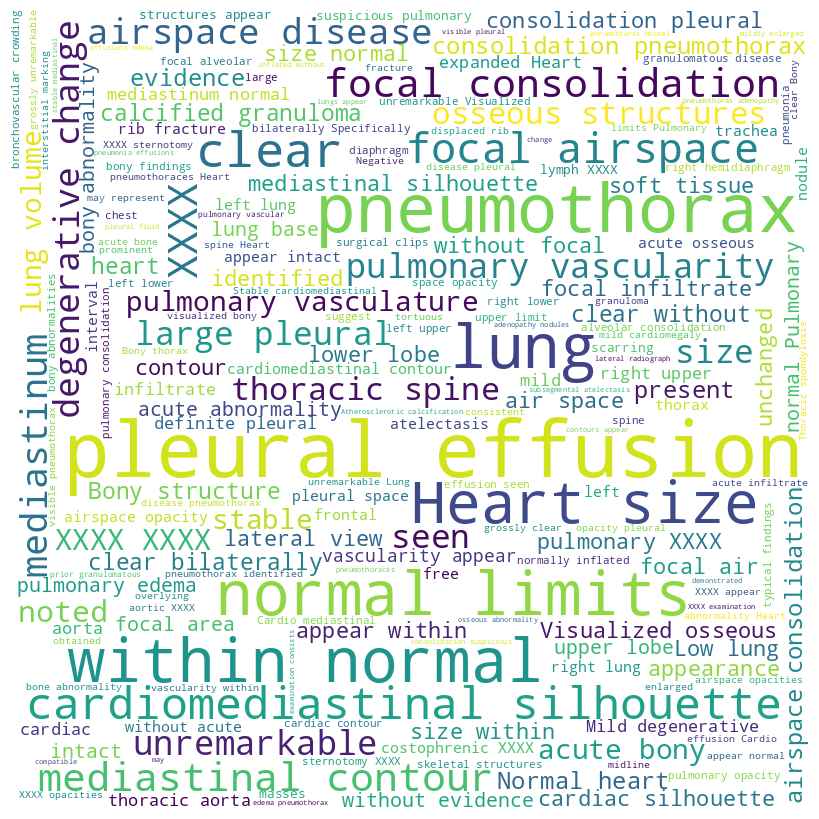

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns


# Basic Statistics
print("Basic Textual Data Statistics:")
print("Number of Unique Reports:", merged_df['findings'].nunique())
print("Average Length of Reports:", merged_df['findings'].str.len().mean())

# Word Cloud for the 'findings' column
text = ' '.join(merged_df['findings'].dropna())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


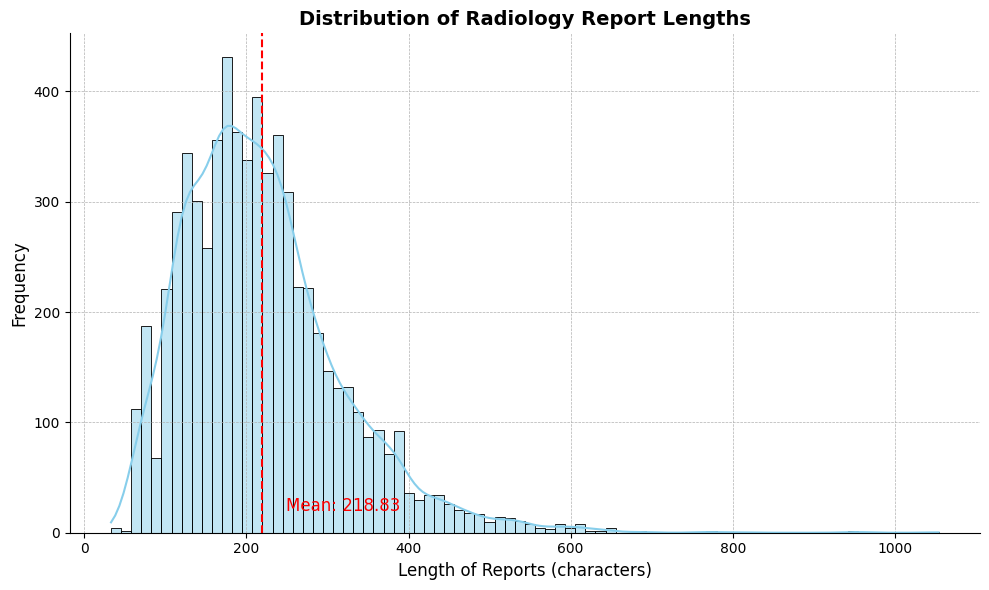

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your dataframe
df = pd.read_csv('/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/merged_dataset.csv')

# Report Length Analysis
df['report_length'] = df['findings'].str.len()

# Creating a more professional plot
plt.figure(figsize=(10, 6))
sns.histplot(df['report_length'], kde=True, color='skyblue')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhancing font and labels
plt.title('Distribution of Radiology Report Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Length of Reports (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Statistical Information
mean_val = df['report_length'].mean()
plt.axvline(mean_val, color='red', linestyle='--')
plt.text(mean_val+30, 20, f'Mean: {mean_val:.2f}', color = 'red', fontsize=12)

# Customizing spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


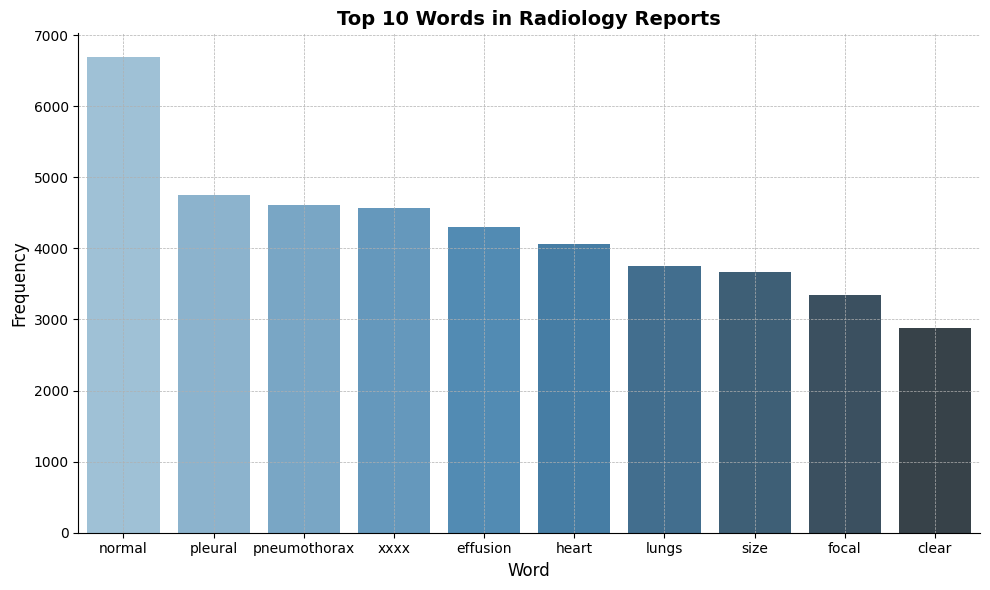

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your dataframe and it's already loaded
vec = CountVectorizer(stop_words='english').fit(df['findings'].dropna())
bag_of_words = vec.transform(df['findings'].dropna())
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_words = words_freq[:10]
top_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Creating a more professional plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=top_df, palette='Blues_d')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhancing font and labels
plt.title('Top 10 Words in Radiology Reports', fontsize=14, fontweight='bold')
plt.xlabel('Word', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customizing spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
# Topic Modeling (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(bag_of_words)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vec.get_feature_names_out(), no_top_words)

Topic 0:
pleural effusion pulmonary stable consolidation heart focal enlarged xxxx size
Topic 1:
spine xxxx changes pneumothorax thoracic degenerative pleural effusion normal heart
Topic 2:
normal lungs clear heart xxxx mediastinum size pleural mediastinal pneumothorax
Topic 3:
normal pneumothorax pleural focal effusion limits silhouette size consolidation cardiomediastinal
Topic 4:
xxxx right left normal chest lateral pleural pneumothorax effusion lung


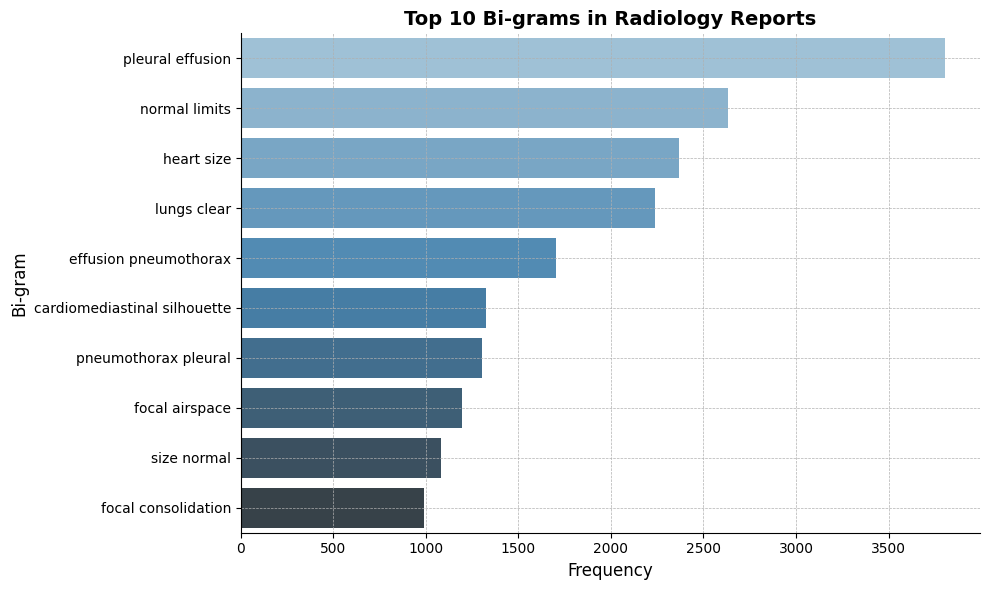

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.util import ngrams

# Function to extract n-grams
def get_top_ngrams(corpus, n=None, ngram=2):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming df is your dataframe
top_bi_grams = get_top_ngrams(df['findings'].dropna(), n=10, ngram=2)
bi_grams_df = pd.DataFrame(top_bi_grams, columns=['Bi-gram', 'Frequency'])

# Creating a more professional plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bi-gram', data=bi_grams_df, palette='Blues_d')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhancing font and labels
plt.title('Top 10 Bi-grams in Radiology Reports', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bi-gram', fontsize=12)

# Customizing spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


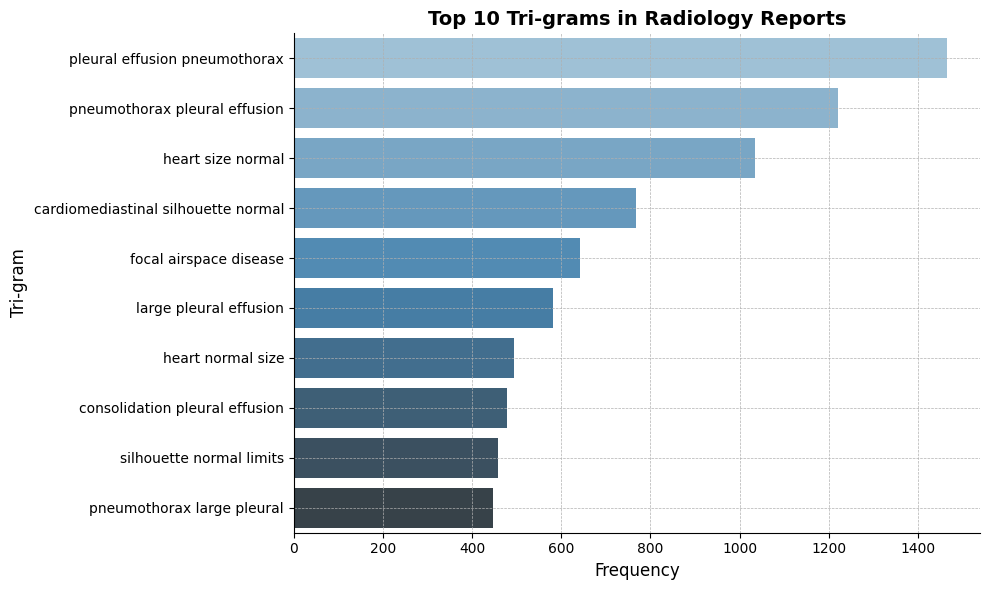

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Assuming get_top_ngrams function and df are defined as before
top_tri_grams = get_top_ngrams(df['findings'].dropna(), n=10, ngram=3)
tri_grams_df = pd.DataFrame(top_tri_grams, columns=['Tri-gram', 'Frequency'])

# Creating a more professional plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Tri-gram', data=tri_grams_df, palette='Blues_d')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhancing font and labels
plt.title('Top 10 Tri-grams in Radiology Reports', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Tri-gram', fontsize=12)

# Customizing spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


In [ ]:
import spacy
from collections import Counter

# Load Spacy NLP model
nlp = spacy.load('en_core_web_sm')

# Sample text for NER
sample_text = df['findings'].dropna().iloc[0]
doc = nlp(sample_text)

# Count entities
entity_counts = Counter([ent.label_ for ent in doc.ents])

# Visualize entities
spacy.displacy.render(doc, style='ent', jupyter=True)

# Print entity counts
print("Entity Counts:", entity_counts)


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Entity Counts: Counter()


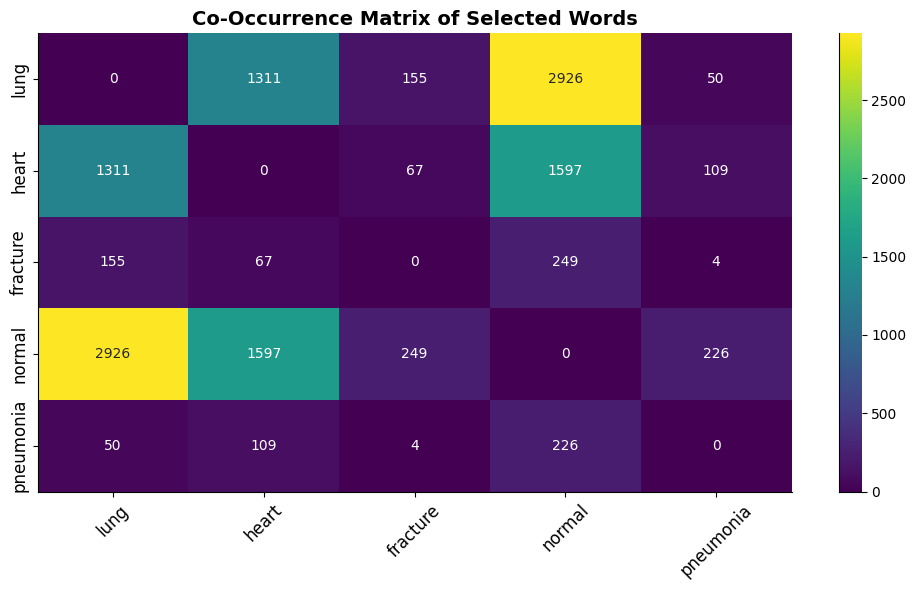

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Assuming df is your dataframe and the previous steps have been executed
selected_words = ['lung', 'heart', 'fracture', 'normal', 'pneumonia']

# Function to build co-occurrence matrix
def co_occurrence_matrix(corpus, words):
    word_dict = {word: [0]*len(words) for word in words}
    for text in corpus:
        for word1, word2 in combinations(words, 2):
            if word1 in text and word2 in text:
                word_dict[word1][words.index(word2)] += 1
                word_dict[word2][words.index(word1)] += 1
    return pd.DataFrame(word_dict, index=words)

# Create and display the matrix
co_matrix = co_occurrence_matrix(df['findings'].dropna(), selected_words)

# Creating a more professional heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(co_matrix, annot=True, cmap='viridis', fmt='d')

# Enhancing font and labels
plt.title('Co-Occurrence Matrix of Selected Words', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Customizing for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00


In [ ]:
import textstat

# Function to calculate readability scores
def readability_scores(text):
    return {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "gunning_fog": textstat.gunning_fog(text)
    }

# Apply to sample text
sample_text = df['findings'].dropna().iloc[0]
scores = readability_scores(sample_text)
print("Readability Scores:", scores)


Readability Scores: {'flesch_reading_ease': 56.11, 'gunning_fog': 9.78}


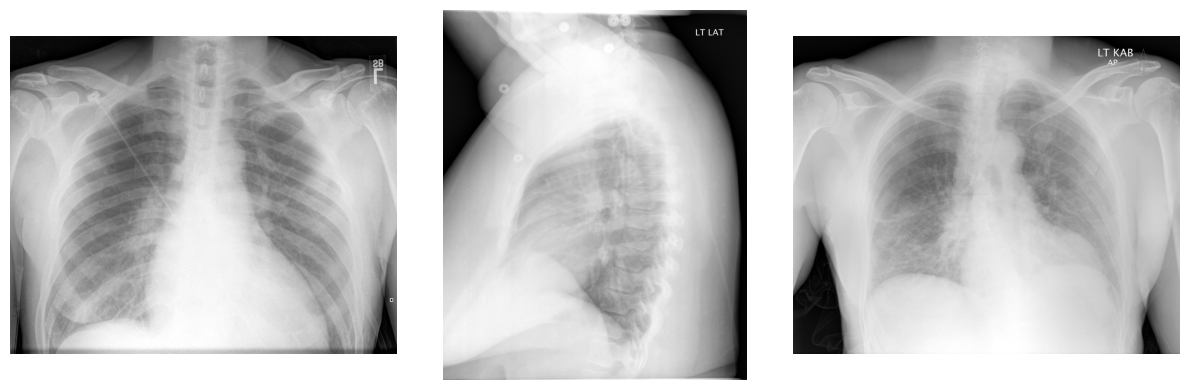

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display a few images
sample_images = merged_df['image_path'].dropna().sample(3).tolist()

plt.figure(figsize=(12, 4))
for i, img_path in enumerate(sample_images, 1):
    img = Image.open(img_path)
    plt.subplot(1, 3, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!ls /content/drive/MyDrive/Datasets/chest-xrays-indiana-university/images/images_normalized

1000_IM-0003-1001.dcm.png	2208_IM-0815-1001.dcm.png	3418_IM-1653-1001.dcm.png
1000_IM-0003-2001.dcm.png	2208_IM-0815-1002.dcm.png	3418_IM-1653-2001.dcm.png
1000_IM-0003-3001.dcm.png	2209_IM-0816-1001.dcm.png	3419_IM-1654-12012.dcm.png
1001_IM-0004-1001.dcm.png	2209_IM-0816-2001.dcm.png	3419_IM-1654-2001.dcm.png
1001_IM-0004-1002.dcm.png	220_IM-0811-1001.dcm.png	3419_IM-1654-4004.dcm.png
1002_IM-0004-1001.dcm.png	220_IM-0811-1002.dcm.png	341_IM-1648-1001.dcm.png
1002_IM-0004-2001.dcm.png	220_IM-0811-1003.dcm.png	341_IM-1648-1002.dcm.png
1003_IM-0005-2002.dcm.png	2210_IM-0817-1001.dcm.png	3420_IM-1656-1001.dcm.png
1004_IM-0005-1001.dcm.png	2210_IM-0817-2001.dcm.png	3420_IM-1656-2001.dcm.png
1004_IM-0005-2001.dcm.png	2211_IM-0818-1001.dcm.png	3421_IM-1656-1001.dcm.png
1005_IM-0006-1001.dcm.png	2211_IM-0818-2001.dcm.png	3421_IM-1656-3001.dcm.png
1005_IM-0006-3003.dcm.png	2212_IM-0819-1001.dcm.png	3422_IM-1656-1001.dcm.png
1006_IM-0007-1001.dcm.png	2212_IM-0819-2001.dcm.png	3422_IM-1656-100

In [16]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import timm
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from tqdm.notebook import tqdm

# Define the preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define a custom dataset
class ImageDataset(Dataset):
    def __init__(self, dataframe, base_dir, transform=None):
        self.dataframe = dataframe
        self.base_dir = base_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.base_dir, self.dataframe.iloc[idx]['image_path'])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/merged_dataset.csv')

# Initialize the dataset
dataset = ImageDataset(
    dataframe=data,
    base_dir='/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/images/images_normalized/',
    transform=preprocess
)

# Initialize the data loader
data_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=2)

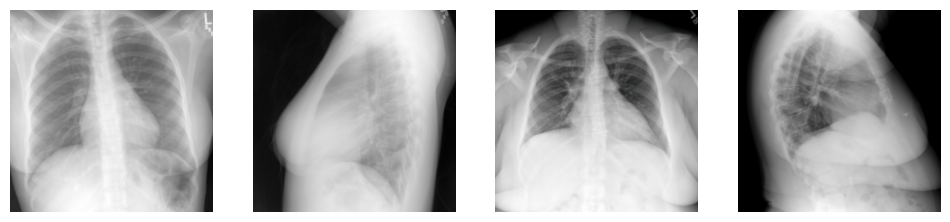

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
# Function to convert a tensor to a PIL image
def tensor_to_pil(tensor):
    # Undo the normalization
    tensor = tensor * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    tensor = tensor.clamp(0, 1)
    return F.to_pil_image(tensor)

# Get a batch of images
images = next(iter(data_loader))

# Display the first few images in the batch
plt.figure(figsize=(12, 8))
for i in range(min(len(images), 4)):  # Display 4 images
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(tensor_to_pil(images[i]))
    plt.axis("off")
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device: " , device)

Using device:  cpu


In [ ]:
# Load the pre-trained ViT model
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model = model.to(device)  # Move the model to GPU if available
model.eval()  # Set the model to evaluation mode

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [ ]:
# Extract features
features = []
with torch.no_grad():
    for inputs in tqdm(data_loader, desc="Extracting features"):
        inputs = inputs.to(device)
        outputs = model.forward_features(inputs)
        features.append(outputs.cpu().detach().numpy())  # Move the features to CPU and convert to numpy

# Convert the list of arrays to a single array
features = np.concatenate(features, axis=0)

# Save the features to a file for further processing
np.save('/content/drive/MyDrive/Datasets/chest_xray_features.npy', features)


Extracting features:   0%|          | 0/234 [00:00<?, ?it/s]

In [ ]:
# Now, `features` is a numpy array where each row corresponds to the features of an image
print(f"Extracted features for {features.shape[0]} images.")

Extracted features for 7466 images.


In [ ]:
import numpy as np

# Load the features from the .npy file
feature_file_path = '/content/drive/MyDrive/Datasets/chest_xray_features.npy'
features = np.load(feature_file_path)

# Check the shape of the loaded features
print("Shape of loaded features:", features.shape)


Shape of loaded features: (7466, 197, 768)


In [ ]:
# Flatten the feature matrices
flattened_features = features.reshape(features.shape[0], -1)

# Now flattened_features is a 2D array
print("Shape of flattened features:", flattened_features.shape)


Shape of flattened features: (7466, 151296)


<ipython-input-3-678576b4960e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis", legend="full")


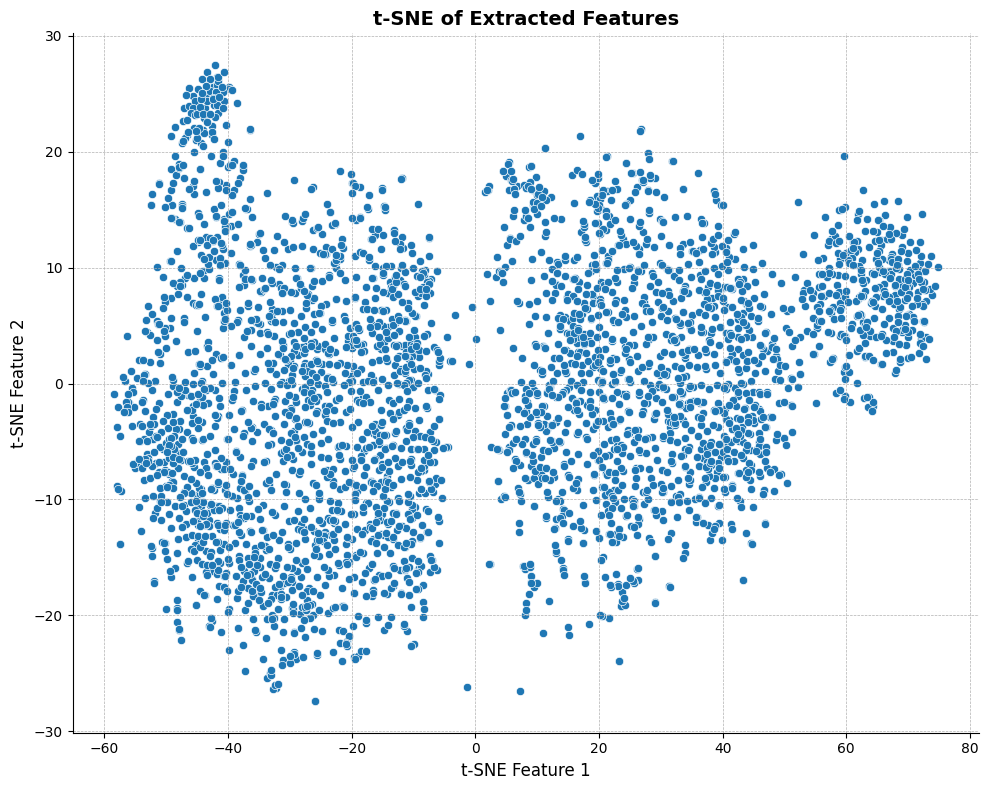

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset for t-SNE (use either flattened_features or pooled_features)
subset_of_features = flattened_features[:3500]

# subset_of_features is defined and contains the features you want to visualize
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(subset_of_features)

# Creating a more professional plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], palette="viridis", legend="full")

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Enhancing font and labels
plt.title('t-SNE of Extracted Features', fontsize=14, fontweight='bold')
plt.xlabel('t-SNE Feature 1', fontsize=12)
plt.ylabel('t-SNE Feature 2', fontsize=12)

# Customizing spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/merged_dataset.csv')
# Assuming your DataFrame doesn't already have a unique identifier, you can use the default index
data['index'] = data.index
# Preprocessing function
def preprocess_text(text):
    # Replace 'nan' with an empty string and remove 'xxxx'
    text = text.replace('nan', '').replace('xxxx', '').replace('x-xxxx', '')

    # Convert to lowercase
    text = text.lower()

    # Replace newline characters with spaces, if any
    text = text.replace('\n', ' ')

    # Additional preprocessing as needed...

    return text



# Apply preprocessing
data['findings'] = data['findings'].astype(str).apply(preprocess_text)
data['impressions'] = data['impression'].astype(str).apply(preprocess_text)

# Combine findings and impressions with index
data['combined_report'] = data['index'].astype(str) + " [IDX] " + data['findings'] + " [SEP] " + data['impressions']

# Convert to list of strings
reports = data['combined_report'].tolist()

In [4]:
reports

['0 [IDX] the cardiac silhouette and mediastinum size are within normal limits. there is no pulmonary edema. there is no focal consolidation. there are no xxxx of a pleural effusion. there is no evidence of pneumothorax. [SEP] normal chest x-xxxx.',
 '1 [IDX] the cardiac silhouette and mediastinum size are within normal limits. there is no pulmonary edema. there is no focal consolidation. there are no xxxx of a pleural effusion. there is no evidence of pneumothorax. [SEP] normal chest x-xxxx.',
 '2 [IDX] borderline cardiomegaly. midline sternotomy xxxx. enlarged pulmonary arteries. clear lungs. inferior xxxx xxxx xxxx. [SEP] no acute pulmonary findings.',
 '3 [IDX] borderline cardiomegaly. midline sternotomy xxxx. enlarged pulmonary arteries. clear lungs. inferior xxxx xxxx xxxx. [SEP] no acute pulmonary findings.',
 '4 [IDX]  [SEP] no displaced rib fractures, pneumothorax, or pleural effusion identified. well-expanded and clear lungs. mediastinal contour within normal limits. no acute

In [5]:
# Save to a text file
with open('/content/drive/MyDrive/Datasets/processed_reports.txt', 'w') as file:
    for report in reports:
        file.write(report + '\n')

In [6]:
from transformers import GPT2Tokenizer

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

# Set the EOS token as the padding token
tokenizer.pad_token = tokenizer.eos_token

# Read the file
with open('/content/drive/MyDrive/Datasets/processed_reports.txt', 'r') as file:
    reports = file.read().split('\n')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

In [7]:
# Tokenize the text
inputs = tokenizer(reports, return_tensors='pt', max_length=218, truncation=True, padding='max_length')

In [21]:
total_tokens = sum(len(input_ids) for input_ids in inputs['input_ids'])

print(f"Total number of tokens: {total_tokens}")

Total number of tokens: 6104


In [8]:
from torch.utils.data import Dataset, DataLoader

class ReportsDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)

# Create the dataset
dataset = ReportsDataset(inputs)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=28, shuffle=True)  # Adjust batch_size as per your GPU capacity

In [9]:
from transformers import GPT2LMHeadModel, AdamW
import torch
# Load the model
model = GPT2LMHeadModel.from_pretrained("distilgpt2")

# Move model to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Initialize optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
# Assuming 'inputs' is your tokenized data
inputs['labels'] = inputs['input_ids'].clone()

In [11]:
from tqdm import tqdm

epochs = 10

# Training loop
model.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in tqdm(dataloader):
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss  # The model returns the loss when provided with labels

        # Check if loss is not None
        if loss is not None:
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        else:
            print("No loss to backpropagate.")

    # Calculate average loss
    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch + 1} completed, Average Loss: {avg_loss:.4f}")

# Save the fine-tuned model
model.save_pretrained("/content/drive/MyDrive/Datasets/finetuned_distilgpt2")

100%|██████████| 267/267 [04:56<00:00,  1.11s/it]


Epoch 1 completed, Average Loss: 0.8229


100%|██████████| 267/267 [05:01<00:00,  1.13s/it]


Epoch 2 completed, Average Loss: 0.5106


100%|██████████| 267/267 [05:00<00:00,  1.13s/it]


Epoch 3 completed, Average Loss: 0.4487


100%|██████████| 267/267 [05:00<00:00,  1.13s/it]


Epoch 4 completed, Average Loss: 0.4109


100%|██████████| 267/267 [05:00<00:00,  1.13s/it]


Epoch 5 completed, Average Loss: 0.3827


100%|██████████| 267/267 [05:00<00:00,  1.13s/it]


Epoch 6 completed, Average Loss: 0.3611


100%|██████████| 267/267 [05:00<00:00,  1.13s/it]


Epoch 7 completed, Average Loss: 0.3428


100%|██████████| 267/267 [05:01<00:00,  1.13s/it]


Epoch 8 completed, Average Loss: 0.3262


100%|██████████| 267/267 [05:01<00:00,  1.13s/it]


Epoch 9 completed, Average Loss: 0.3112


100%|██████████| 267/267 [05:01<00:00,  1.13s/it]


Epoch 10 completed, Average Loss: 0.2981


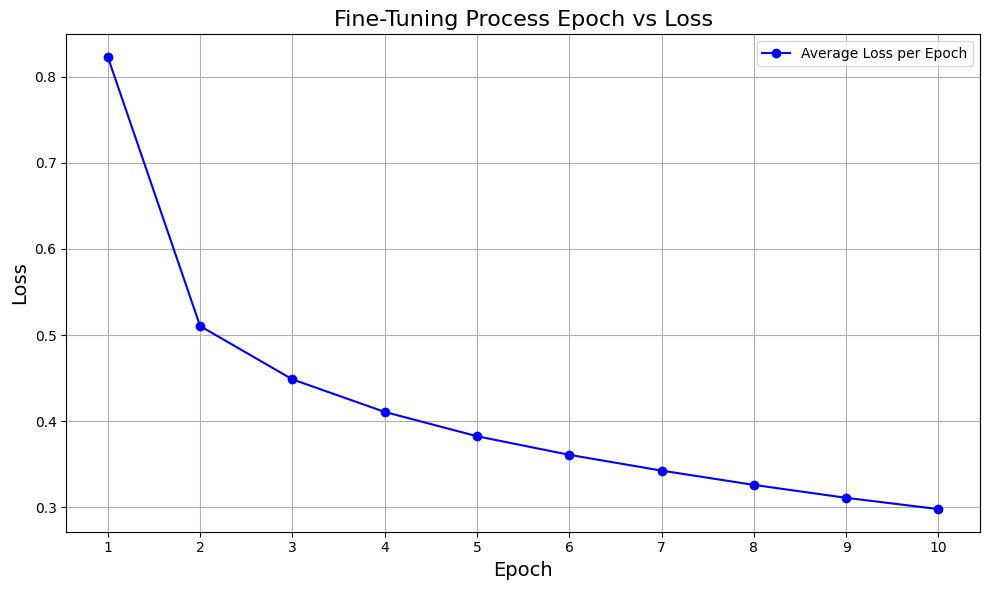

In [12]:
import matplotlib.pyplot as plt

# Assuming you have collected average loss per epoch in a list
average_losses = []  # Replace this with your actual list of average losses per epoch

average_losses = [0.8229, 0.5106, 0.4487, 0.4109, 0.3827, 0.3611, 0.3428, 0.3262, 0.3112, 0.2981]
epochs = range(1, len(average_losses) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, average_losses, marker='o', linestyle='-', color='b', label='Average Loss per Epoch')
plt.title('Fine-Tuning Process Epoch vs Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot (optional)
#plt.savefig("/content/drive/MyDrive/Datasets/epoch_vs_loss.png", dpi=300)

# Show the plot
plt.show()


In [15]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
model = GPT2LMHeadModel.from_pretrained("/content/drive/MyDrive/Datasets/finetuned_distilgpt2")
model.to(device)

# Compute perplexity over the validation dataset
total_loss = 0
model.eval()
with torch.no_grad():
    for batch in dataloader:
        # Ensure batch is on the correct device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch.get('attention_mask', None)
        if attention_mask is not None:
            attention_mask = attention_mask.to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=input_ids)
        total_loss += outputs.loss.item()

average_loss = total_loss / len(dataloader)
perplexity = torch.exp(torch.tensor(average_loss))

print(f"Perplexity: {perplexity}")

Perplexity: 1.2815288305282593


In [17]:
import torch
import timm
from torchvision import transforms
from PIL import Image
from io import BytesIO

# Define the preprocessing transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to load an image
def load_image(image_bytes):
    image = Image.open(BytesIO(image_bytes)).convert('RGB')
    image = preprocess(image)
    return image

# Function to extract features from a single image
def extract_features(image_bytes, model):
    image = load_image(image_bytes)
    image = image.unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        image = image.to(device)
        features = model.forward_features(image)
        return features.cpu().numpy()

# Load the pre-trained ViT model
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()

# Load your image (replace with the path to your uploaded image)
uploaded_image_bytes = open('/content/datast2.png', 'rb').read()

# Extract features from the uploaded image
extracted_features = extract_features(uploaded_image_bytes, model)
# Reshape the extracted features to match the dimensionality
# Change from (1, 197, 768) to (197, 768)
extracted_features = extracted_features.reshape(197, 768)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [18]:
extracted_features.shape

(197, 768)

In [19]:
import numpy as np

# Load pre-extracted features
pre_extracted_features = np.load('/content/drive/MyDrive/Datasets/chest_xray_features.npy')

In [22]:
pre_extracted_features.shape

(7466, 197, 768)

In [23]:
# Reshape pre_extracted_features from (7466, 197, 768) to (7466, 197*768)
pre_extracted_features_flat = pre_extracted_features.reshape(pre_extracted_features.shape[0], -1)
pre_extracted_features_flat.shape

(7466, 151296)

In [24]:
from numpy.linalg import norm
def cosine_similarity(a, b):
    return np.dot(a, b.T) / (norm(a) * norm(b, axis=1))

In [25]:
def find_most_similar_image(uploaded_features, dataset_features_flat):
    similarities = cosine_similarity(uploaded_features, dataset_features_flat)
    most_similar_index = np.argmax(similarities)
    max_similarity = similarities[most_similar_index]
    return most_similar_index, max_similarity

# Assuming extracted_features is reshaped to (197*768)
extracted_features_flat = extracted_features.reshape(-1)

# Find the most similar image
index_of_most_similar, similarity_score = find_most_similar_image(extracted_features_flat, pre_extracted_features_flat)

print(f"Most similar image index: {index_of_most_similar}, Similarity: {similarity_score}")

Most similar image index: 7154, Similarity: 0.5861348509788513


In [26]:
import pandas as pd
# Load the dataset to find the corresponding data
data = pd.read_csv('/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/merged_dataset.csv')

# Retrieve the data for the most similar image
similar_image_data = data.iloc[index_of_most_similar]

In [27]:
similar_image_data

uid                                                        3840
MeSH          Thoracic Vertebrae/degenerative;Cardiomegaly;M...
Problems      Thoracic Vertebrae;Cardiomegaly;Mediastinum;Pu...
image         PA and lateral chest x-XXXX XXXX, XXXX at XXXX...
indication                 XXXX-year-old woman with tachycardia
comparison                              Portable chest on XXXX.
findings      No acute osseous abnormality. Degenerative cha...
impression    1. Bilateral airspace disease. 2. Stable enlar...
filename                              3840_IM-1941-2001.dcm.png
projection                                              Frontal
image_path    /content/drive/MyDrive/Datasets/chest-xrays-in...
Name: 7154, dtype: object

In [28]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load the fine-tuned model
model_path = "/content/drive/MyDrive/Datasets/finetuned_distilgpt2"
model = GPT2LMHeadModel.from_pretrained(model_path)

# Load the tokenizer and set the pad token
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')
tokenizer.pad_token = tokenizer.eos_token


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [29]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets/chest-xrays-indiana-university/merged_dataset.csv')

# Get the corresponding row for the most similar image
similar_image_data = data.iloc[index_of_most_similar]

# Extract relevant information (e.g., findings, impressions)
# You may adjust this based on how your model was fine-tuned
prompt_text = similar_image_data['MeSH'] #+ " " + similar_image_data['impression']


In [30]:
prompt_text

'Thoracic Vertebrae/degenerative;Cardiomegaly;Mediastinum/prominent;Pulmonary Congestion;Lung/bilateral/hypoinflation/mild;Opacity/lung/base/bilateral;Opacity/lung/hilum/left;Pleural Effusion/bilateral;Airspace Disease/lung/bilateral'

In [31]:
# Tokenize the prompt text
input_ids = tokenizer.encode(prompt_text, return_tensors="pt")

# Generate text using the model
output_sequences = model.generate(
    input_ids=input_ids,
    max_length=218,  # Adjust as per your requirement
    temperature=0.5,
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.2,
    do_sample=True,
    num_return_sequences=1
)

# Decode the generated text
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)

print("Generated Report:\n", generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Report:
 Thoracic Vertebrae/degenerative;Cardiomegaly;Mediastinum/prominent;Pulmonary Congestion;Lung/bilateral/hypoinflation/mild;Opacity/lung/base/bilateral;Opacity/lung/hilum/left;Pleural Effusion/bilateral;Airspace Disease/lung/bilateral


In [ ]:
# Reference report (original report from the dataset)
reference_report = similar_image_data['findings'] + " " + similar_image_data['impression']

# Generated report (from your model)
generated_report = generated_text


In [ ]:
pip install nltk rouge bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
from rouge import Rouge
from bert_score import score

# Tokenize the reports
reference_tokens = word_tokenize(reference_report.lower())
generated_tokens = word_tokenize(generated_report.lower())

# Calculate BLEU score
bleu_score = sentence_bleu([reference_tokens], generated_tokens)
print(f"BLEU Score: {bleu_score}")

# Calculate ROUGE scores
rouge = Rouge()
rouge_scores = rouge.get_scores(generated_report, reference_report)
print(f"ROUGE Scores: {rouge_scores}")

# Calculate BERTScores
P, R, F1 = score([generated_report], [reference_report], lang="en", verbose=True)
print(f"BERTScore Precision: {P.mean()}")
print(f"BERTScore Recall: {R.mean()}")
print(f"BERTScore F1 Score: {F1.mean()}")


BLEU Score: 0.9858120083502484
ROUGE Scores: [{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}]


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.56 seconds, 1.78 sentences/sec
BERTScore Precision: 0.9973685145378113
BERTScore Recall: 0.9985445737838745
BERTScore F1 Score: 0.9979562163352966
